In [31]:
#Importamos las librerías que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.sqrt(2)

1.4142135623730951

In [ ]:
#Encontrar raiz de x**2-13

# Newton-Raphson

In [ ]:
#Queremos ver el método de NR en acción.
#Definimos la función de NR, que vamos a llamar recursivamente, pero primero una función y su derivada.
def func(x):
  return x**3-x**2+1

def dfunc(x):
  return 3*x**2-2*x


In [ ]:
for (i in 0:10){
    indent
}

range(0, 10)

In [ ]:
#Estructuras de control básicas: For, if
for i in range(10):
  if i < 2:
    print("hola")
  print(func(i))
  print("basta")

hola
-2
basta
hola
-1
basta
2
basta
7
basta
14
basta
23
basta
34
basta
47
basta
62
basta
79
basta


In [ ]:
def newton(x0,epsilon,max_iter,f=func,Df=dfunc):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [ ]:
newton(21,0.00000001,30, func, dfunc)

Found solution after 14 iterations.


-0.7548776662466977

In [ ]:
def newtonE(x0,epsilon,max_iter,root,f=func,Df=dfunc):
    xn = x0
    errsq = []
    err = []
    axis = []
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            plt.plot(axis,errsq, label = "error e_n al cuadrado")
            plt.plot(axis,err, label = "error e_(n+1)")
            plt.legend(loc='best')
            plt.show()
            plt.plot(errsq,err)
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        errsq.append(abs(xn-root)**2)
        xn = xn - fxn/Dfxn
        err.append(abs(xn-root))
        axis.append(n)


    print('Exceeded maximum iterations. No solution found.')
    return None

Found solution after 4 iterations.


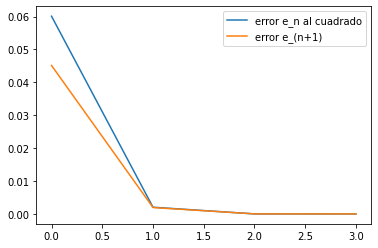

-0.7548776662613993

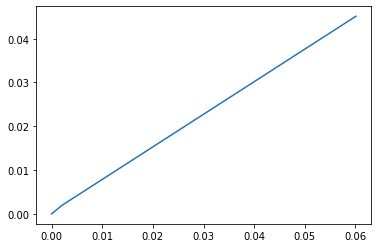

In [ ]:
newtonE(-1,0.0000001,30,-0.7548776662466977)

# Recursiones y Caos

In [ ]:
def logistic(r, x):
    return r * x * (1 - x)

def cmap(r, x):
    return r*(x-0.5)**2

def sin(r,x): #El seno también tiene un máximo cuadrático! 
  return r*np.sin(np.pi*x)

def sin2(r,x):
  return np.sin(np.pi*x*r)

def tent(r,x): #Esta función no da un diagrama de bifurcación como el resto, sino que tiene una región de awtracción posiblemente similar al conjunto de Cantor
  return r*(1-2*abs(x-0.5)) #https://hypertextbook.com/chaos/universality/

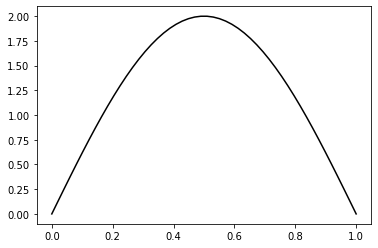

In [ ]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, sin(2, x), 'k')

In [ ]:
def plot_system(r, x0, n, func, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, func(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = func(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

Texto

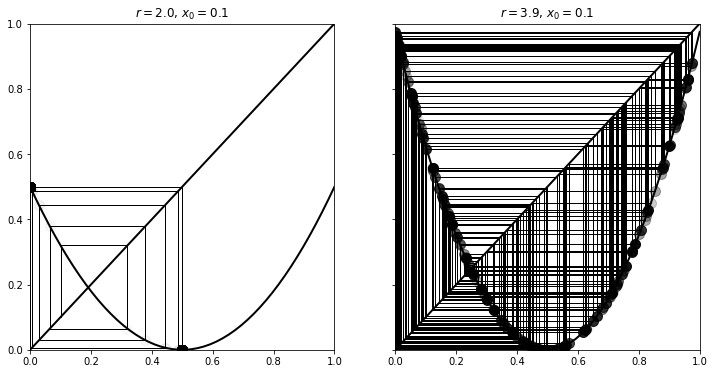

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2, .1, 100,cmap, ax=ax1)
plot_system(3.9, 0.1, 200, cmap,ax=ax2)

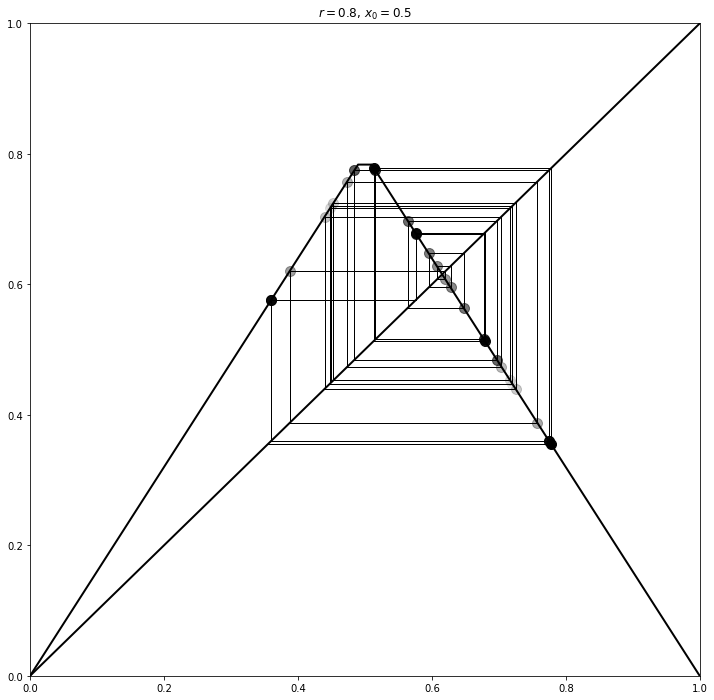

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))
plot_system(0.8, .45, 30,tent, ax=ax1)

In [ ]:
n = 10000
r = np.linspace(0.5,1, n) #2.5 a 4 para logístico, 2 a 4 para cmap, 0.6 a 1 para sin y para sin2, y 0.5 a 1 para tent
iterations = 1000
last = 100
x = 1e-5 * np.ones(n) 

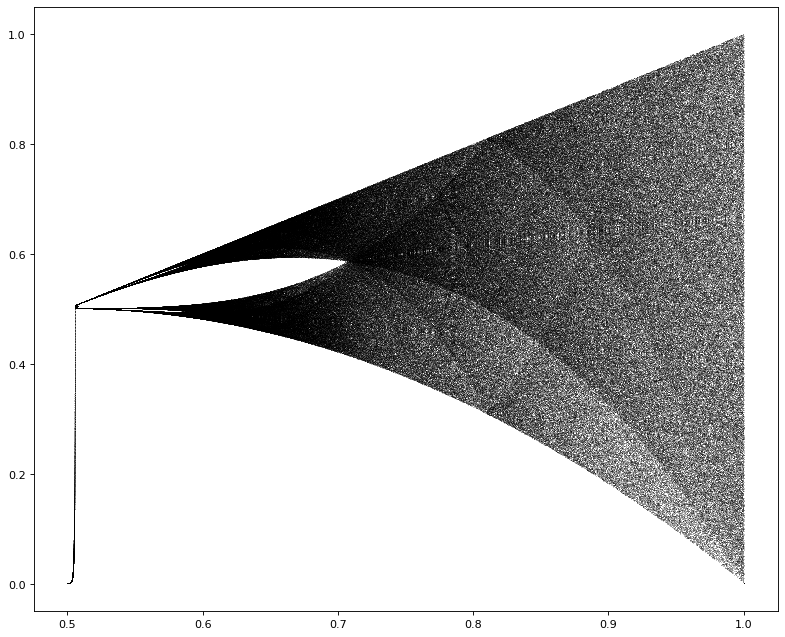

In [ ]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax1 = fig.add_subplot()
for i in range(iterations):
    x = tent(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
      lines = ax1.plot(r, x, ',k', alpha=.25)

# Método de Euler

In [ ]:
# Euler tiene parámetros: x_min, x_max, y el step-size "h", y el y0
x_max = 1
x_min = 0
h=0.3
y0 = 0

steps = int((x_max-x_min)//h)

x = [x_min + h*i for i in range(steps+1)]

def f(x,y):
  return x**2-y**2

y = [y0]

for i in range(steps):
  y1 = y[i] + h*f(x[i], y[i])
  y.append(y1)

In [ ]:
def f(x,y):
  return 2*x+y

def f_sol(x):
  return -2*x-2+2*np.exp(x)

def Euler(x_min, x_max, y0, h):
  steps = int((x_max-x_min)//h)
  x = [x_min + h*i for i in range(steps+1)]
  y = [y0]
  verdad = [y0]
  for i in range(steps):
    y1 = y[i] + h*f(x[i], y[i])
    y.append(y1)
    verdad.append(f_sol(x[i+1]))
  return x, y , verdad

In [ ]:
x,y,verdad = Euler(0,2,0,0.1)

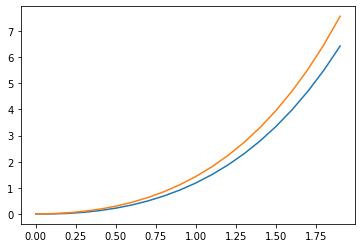

In [ ]:
plt.plot(x,y)
plt.plot(x,verdad)

In [21]:
import random

a = random.randint(0,100000000)


def metodo_babilonico(a, error):
    x = random.randint(1,a) 
    c = 0
    X = []
    while abs(x - a/x) > error:
      X.append(x)
      x = (x + a/x)/2;
      c = c + 1;
        
    return x,c,X

y, k, Y = metodo_babilonico(10,0.001)

#print(str(metodo_babilonico(a)))


In [20]:
y, k, Y = metodo_babilonico(10,0.001)

[]
[10]
10


In [37]:
cantidad = 10
Cant = []
A = []
Y=[]
for i in range(cantidad):
  a = random.randint(0,100000000)
  x,c,X = metodo_babilonico(a,0.001)
  Cant.append(c)
  A.append(a)
  Y.append(X)


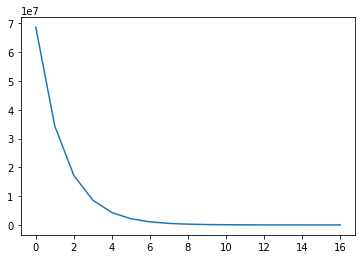

In [42]:
plt.plot(Y[8])